# **Project Name**: Fedex EDA




# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

#Loading Dataset

In [2]:
df = pd.read_csv('./SCMS_Delivery_History_Dataset.csv')

In [3]:
# first 5 rows in dataset
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
# last 5 rows in dataset
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [5]:
#check shape
print(f"Total No of Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Total No of Rows: 10324 and Columns: 33


In [6]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
# total no of unique values in each columns
df.nunique()

,0
ID,10324
Project Code,142
PQ #,1237
PO / SO #,6233
ASN/DN #,7030
Country,43
Managed By,4
Fulfill Via,2
Vendor INCO Term,8
Shipment Mode,4


In [8]:
# Changing the format of column related to dates
dt = ['PQ First Sent to Client Date' ,'PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date']
for col in dt:
  df[col] = pd.to_datetime(df[col], errors='coerce')

<ipython-input-8-7cc80dfdf304>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-8-7cc80dfdf304>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-8-7cc80dfdf304>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-8-7cc80dfdf304>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-8-7cc80dfdf304>:4: UserWarning:

Could not infer format, so each element will be parsed individually, fal

# Checking duplicated values

In [9]:
# chexking duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10319,False
10320,False
10321,False
10322,False


In [10]:
df.duplicated().sum()

np.int64(0)

# Checking null values

In [11]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [12]:
#null values in percentage
df.isnull().mean()*100

,0
ID,0.000000
Project Code,0.000000
PQ #,0.000000
PO / SO #,0.000000
ASN/DN #,0.000000
Country,0.000000
Managed By,0.000000
Fulfill Via,0.000000
Vendor INCO Term,0.000000
Shipment Mode,3.487021


Obervation:
  There is no duplicate values in this dataset

<Axes: >

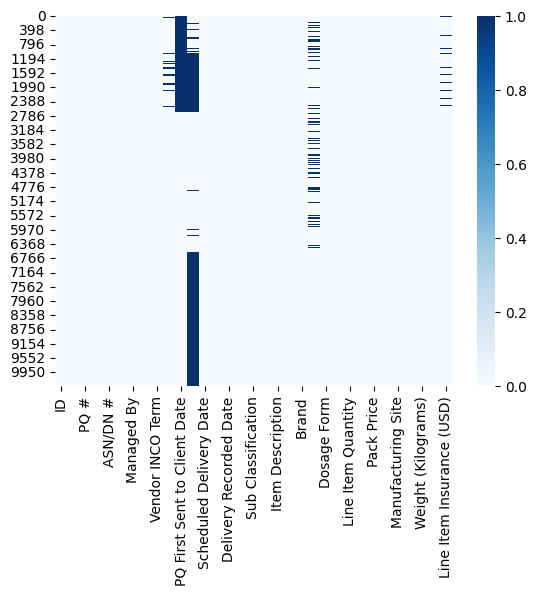

In [13]:
# heatmap for null values
sns.heatmap(df.isnull(), cmap ="Blues")

# Handling null values and cleaning dataset

In [14]:
df[['Weight (Kilograms)','Freight Cost (USD)']].head(15)

,Weight (Kilograms),Freight Cost (USD)
0,13,780.34
1,358,4521.5
2,171,1653.78
3,1855,16007.06
4,7590,45450.08
5,504,5920.42
6,328,Freight Included in Commodity Cost
7,1478,6212.41
8,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281)
9,643,Freight Included in Commodity Cost


In [15]:
# Tackling Weight & Freight missing values
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0)

In [16]:
# Dictionaries with ID as keys and weight/freight as values
id_weight = dict(zip(df['ID'],df['Weight (Kilograms)']))
id_freight = dict(zip(df['ID'],df['Freight Cost (USD)']))

In [17]:
# Functions to get weight and freight from corresponding ID numbers
def get_weight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_weight.get(int(e))
        except:
            return (data)
    else:
        return (data)

def get_freight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_freight.get(int(e))
        except:
            return (data)
    else:
        return (data)

In [18]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].apply(get_weight)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(get_freight)

<ipython-input-17-249486b355d5>:3: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

<ipython-input-17-249486b355d5>:15: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [19]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors = 'coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors = 'coerce')

In [20]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].mean())

In [21]:
# Replace NAN with mode in Dosage column
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

In [22]:
# Drop rows with no shipment mode
df = df.dropna(subset=['Shipment Mode'])

In [23]:
# Fill Insurance with percentage value of line item value
perc = df['Line Item Insurance (USD)'].sum() / df['Line Item Value'][df['Line Item Insurance (USD)'] >= 0].sum()
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(round(df['Line Item Value']*perc, 2))

<ipython-input-23-9529c1d7fe67>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Fill PO & PQ dates
#Calculate Average days between Price Quote-->Purchase Order--> Scheduled Delivery
pq_del_days = round((df['Scheduled Delivery Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
pq_po_days = round((df['PO Sent to Vendor Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
po_del_days = round((df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days.mean(),0)

In [25]:
print (pq_del_days)
print (pq_po_days)
print (po_del_days)

172.0
54.0
106.0


In [26]:
# Assigning estimated dates of Price Quotation and Purchase Order
from datetime import date, timedelta
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=pq_del_days))
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=po_del_days))

<ipython-input-26-ab17682a06d3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-ab17682a06d3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data Visualization

Text(0.5, 0, 'Country Name')

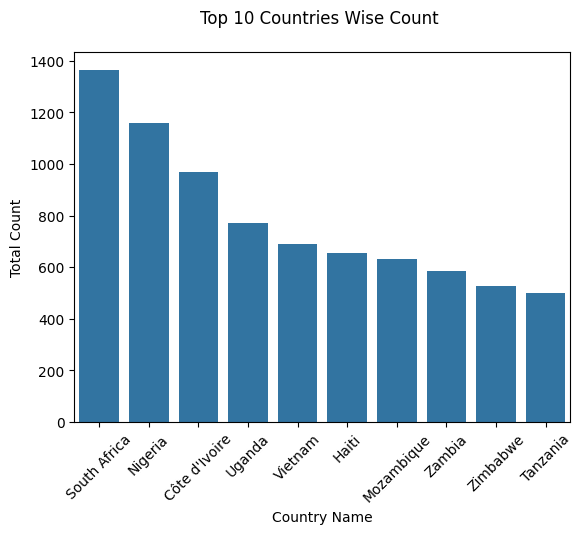

In [27]:
sns.countplot(df,x ='Country',
              order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xticks(rotation = 45)
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [28]:
print("The sum of Generic Unit Price total is ", df[df['Brand']=='Generic']['Unit Price'].sum())
px.bar(df.groupby('Brand')['Unit Price'].count().sort_values(ascending=False), title='Count of Unit Prices wrt Brands')

The sum of Generic Unit Price total is  1241.2


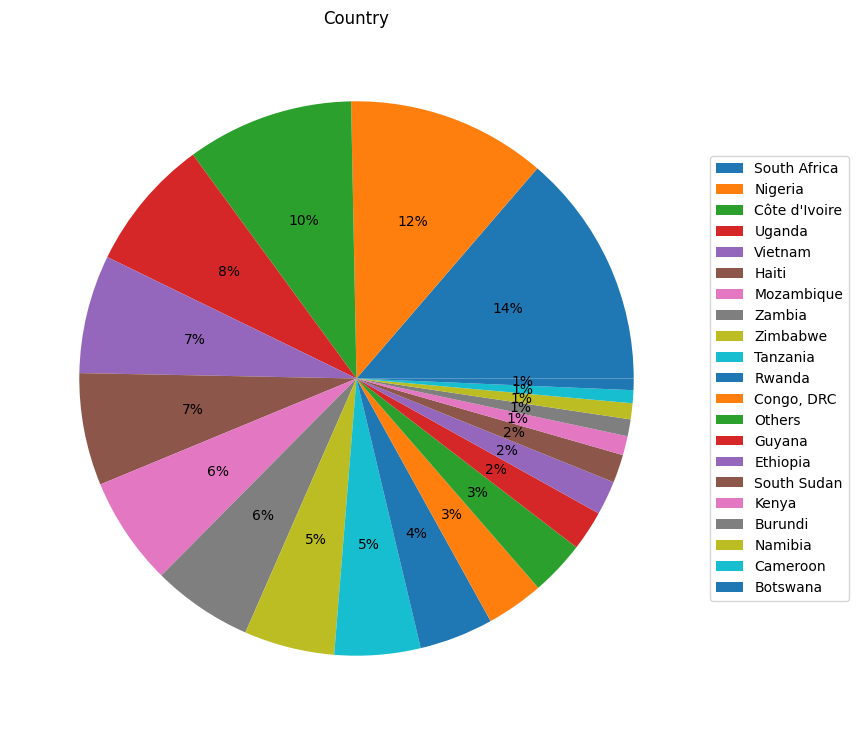

In [29]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

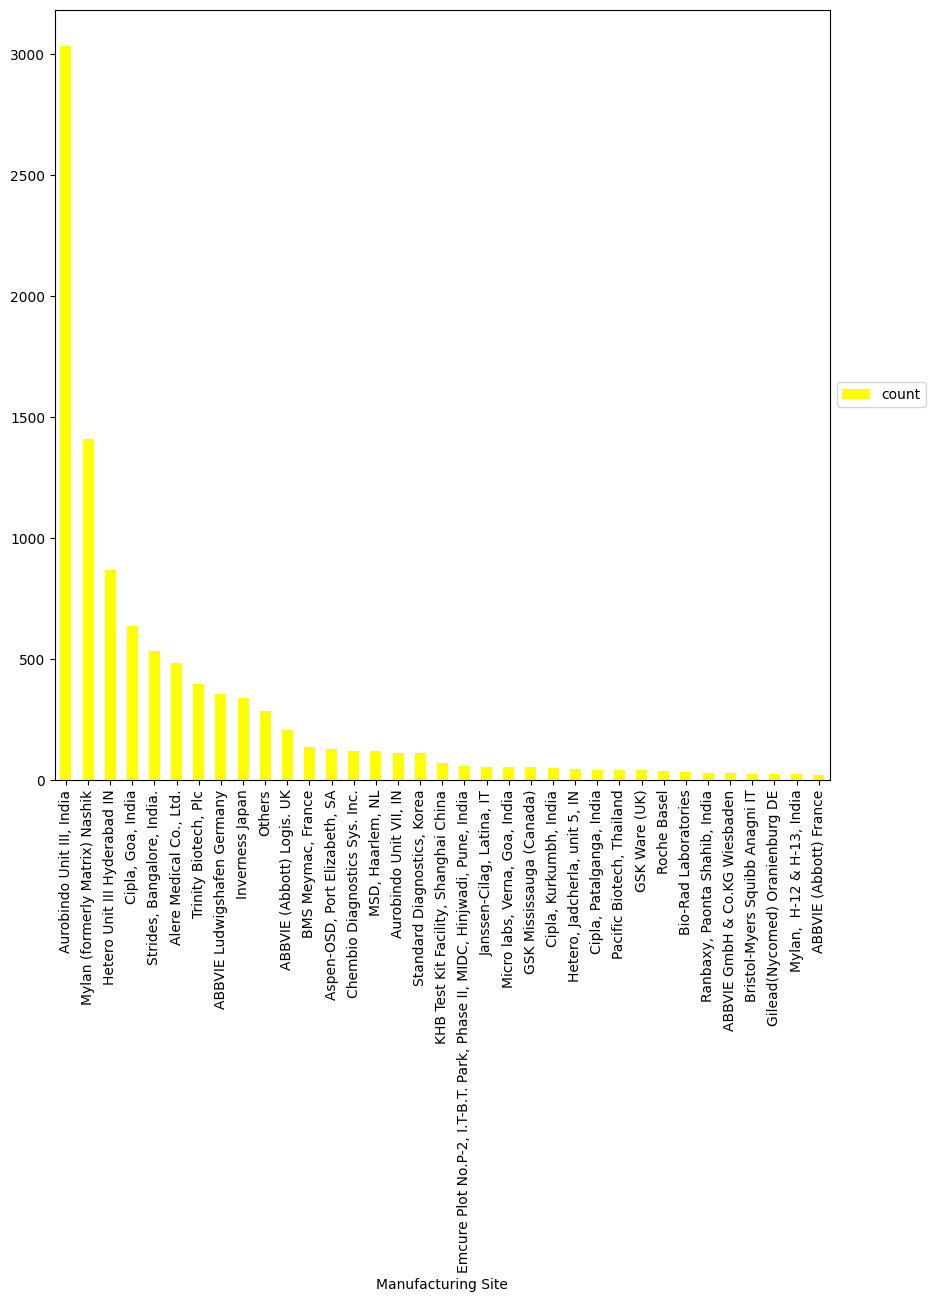

In [30]:
counts = df['Manufacturing Site'].value_counts()
idx = counts[counts.lt(20)].index
df.loc[df['Manufacturing Site'].isin(idx), 'Manufacturing Site'] = 'Others'
df["Manufacturing Site"].value_counts().plot(kind="bar",figsize=(10,10),color ='yellow')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")